In [2]:
import cv2
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color

# Problem 1 - Scale-Invariant Feature Transform (SIFT) and Object Matching (30 points)

a) (5 points) Read the image "book2.jpg" and convert it to grayscale. Extract SIFT keypoints and descriptors using the SIFT_create() function. Visualize a random selection of 50 SIFT features using the drawKeypoints function. Display the grayscale image and the detected SIFT keypoints (features) side by side.


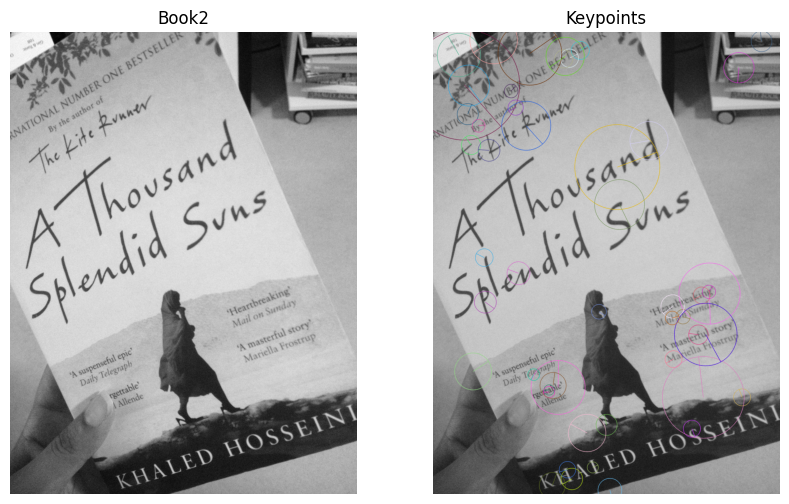

In [166]:
book2 = cv2.imread('images/book2.jpg')
gray2 = cv2.cvtColor(book2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)
selected = random.sample(keypoints2, 50)

# Increase the size of keypoints for visualization
for kp in selected:
    kp.size *= 15

keypoints2_img = cv2.drawKeypoints(gray2, selected, None ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.title.set_text('Book2')
ax2.title.set_text('Keypoints')
ax1.axis('off')
ax2.axis('off')
ax1.imshow(gray2, cmap='gray')
ax2.imshow(keypoints2_img, cmap='gray')
plt.show()
plt.show()

b) (5 points) Extract SIFT descriptors from the detected keypoints for both "book2.jpg" and "book1.jpg." Store these descriptors in separate objects, one for each image.


In [167]:
book1 = cv2.imread('images/book1.jpg')
gray1 = cv2.cvtColor(book1, cv2.COLOR_BGR2GRAY)
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)

c) (5 points) Extract keypoints and descriptors for "book1.jpg" using the same SIFT feature extraction process. Store these keypoints in an object named "keypoints2" and descriptors in an object named "descriptors2."


In [168]:
# Oops, this is a repeat of part a / b

d) (10 points) Use SIFT matching methods with the BFMatcher (Brute-Force Matcher) to match descriptors between "book1.jpg" and "book2.jpg." Display the matching of SIFT descriptors in a visually interpretable way.


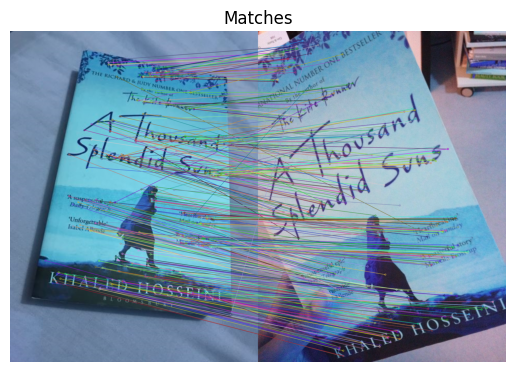

In [174]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# optional: filter matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

result = cv2.drawMatches(book1, keypoints1, book2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plot = plt.imshow(result)
plt.title('Matches')
plt.axis('off')
plt.show()

e) (5 points) Observations and Advantages of SIFT: Comment on what you have observed during the SIFT matching process. Explain how the extracted SIFT features are useful for object matching and why they are advantageous for local feature extraction in computer vision applications.

# Problem 2 : Huffman Binary Tree (30 points)
Huffman coding is a lossless image compression technique. In this problem, we will
understand the Huffman coding algorithm better, but will not be required to implement it.
PS; you will not be required to generate the compressed image from the original image.

a) (5 points) Read the image mario.jpg, convert the image to grayscale with each pixel ranging between 0 and 15 (only 4 bits to represent each pixel), and display the grayscale image and its histogram side by side.

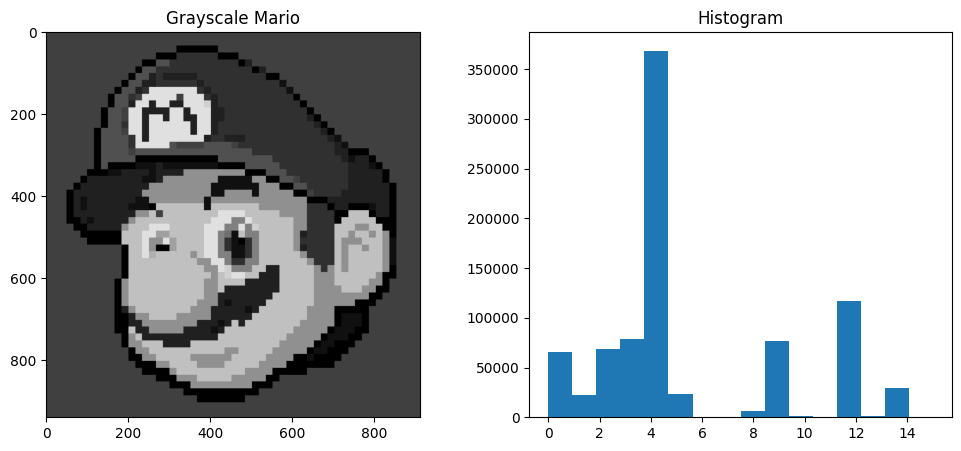

In [4]:
def histogram(img, max_val=256):
    histogram = np.zeros(max_val)
    rows = img.shape[0]
    cols = img.shape[1]
    for i in range(rows):
        for j in range(cols):
            histogram[img[i][j]] += 1
    return histogram.astype(int)

mario = mpimg.imread('images/mario.png')
mario = np.uint8(color.rgb2gray(mario) * 15)

hist = histogram(mario, max_val=16)
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.title.set_text('Grayscale Mario')
ax2.title.set_text('Histogram')
ax1.imshow(mario, cmap='gray', vmin=0, vmax=16)
ax2.hist(list(range(0, 16)), weights=hist, bins=16)
plt.show()

b) (10 points) Write a python/matlab function to generate the Huffman tree. The function should take the input parameter as an array of size 16 which contains the corresponding number of occurrences for each pixel value. The function should then calculate the probabilities for each pixel value, and then generate the Huffman tree as described in the module slides. Display the Huffman tree for mario.jpg with proper formatting by generating the input array of size 16 for the image and passing through the function.

In [9]:
from ppbtree import print_tree

class huffman_node:
    def __init__(self, value=None, code=None, probability=0, left=None, right=None):
        if value is not None:
            self.name = [round(probability, 3), value]
        else:
            self.name = round(probability, 3)
        self.value = value
        self.code = code
        self.probability = probability
        self.left = left
        self.right = right

    def set_code(self, current=''):
        if self.value is not None:
            self.code = current
            self.name.append(current)
        else:
            if self.left is not None:
                self.left.set_code(current + '0')
            if self.right is not None:
                self.right.set_code(current + '1')

    def get_code(self, current={}):
        if self.value is not None:
            current[self.value] = self.code
        else:
            if self.left is not None:
                self.left.get_code(current)
            if self.right is not None:
                self.right.get_code(current)

        return current


def huffman_tree(histogram=[]):
    nodes = [huffman_node(value=level, probability=occurrences / np.sum(histogram))
              for level, occurrences in enumerate(histogram) if occurrences != 0]

    for _ in range(len(nodes) - 1):
        nodes.sort(key=lambda x: x.probability)
        right = nodes.pop(0)
        left = nodes.pop(0)
        nodes.append(huffman_node(probability=left.probability+right.probability, left=left, right=right))

    nodes[0].set_code()
    return nodes[0]

root = huffman_tree(hist)
print_tree(root, nameattr='name', left_child='left', right_child='right')


                      ┌[0.092, 3, '0000']
                ┌0.181┤
                |     └[0.09, 9, '0001']
          ┌0.338┤
          |     |     ┌[0.08, 2, '0010']
          |     └0.156┤
          |           └[0.077, 0, '0011']
    ┌0.571┤
    |     |     ┌[0.136, 12, '010']
    |     └0.233┤
    |           |           ┌[0.034, 14, '01100']
    |           |     ┌0.061┤
    |           |     |     └[0.027, 5, '01101']
    |           └0.097┤
    |                 |     ┌[0.026, 1, '01110']
    |                 └0.036┤
    |                       |    ┌[0.007, 8, '011110']
    |                       └0.01┤
    |                            |           ┌[0.001, 10, '01111100']
    |                            |     ┌0.002┤
    |                            |     |     |     ┌[0.0, 11, '011111010']
    |                            |     |     └0.001┤
    |                            |     |           └[0.0, 7, '011111011']
    |                            └0.003┤
    |               

c) (10 points) Write a python/matlab function which extends/uses the previous function, and additionally calculates the codeword for each pixel value from 0 to 15. The function should take the input parameter as an array of size 16 with the corresponding number of occurrences for each pixel value. Display the codeword generated for each pixel value in mario.jpg by generating the input array of size 16 for the image and passing through the function.

In [10]:
def get_codes(histogram):
    root = huffman_tree(histogram)
    return root.get_code()

codes = sorted(get_codes(hist).items())
for code in codes:
    print(code)


(0, '0011')
(1, '01110')
(2, '0010')
(3, '0000')
(4, '1')
(5, '01101')
(7, '011111011')
(8, '011110')
(9, '0001')
(10, '01111100')
(11, '011111010')
(12, '010')
(13, '0111111')
(14, '01100')


d) (5 points) Write a python/matlab function which extends/uses the previous function, and additionally calculates the new BPP and the compression ratio after applying Huffman coding. The function should take the input parameter as an array of size 16 with the corresponding number of occurrences for each pixel value, and the output of the function should be the new BPP and the compression ratio. Report the BPP and compression ratio achieved for mario.jpg by generating the input array of size 16 for the image and passing through the function.

In [11]:
def compute_ratios(histogram):
    probabilities = histogram / np.sum(histogram)
    codes = get_codes(histogram)
    orig_bits = math.log2(len(histogram))
    code_bits = sum(len(codes[key]) * probabilities[key] for key in codes.keys())
    ratio = orig_bits / code_bits
    return code_bits, ratio

bpp, compression = compute_ratios(hist)
print(f'BPP: {bpp}')
print(f'CR: ({compression}:1)')
print(f'Note: depending on the way you convert to grayscale in part a, you might get slightly different results due to rounding.')

BPP: 2.690065878299735
CR: (1.4869524320081757:1)
Note: depending on the way you convert to grayscale in part a, you might get slightly different results due to rounding.


# Question 3 : Hough Transform (30 points)
In this problem, you will work with the Canny edge detector and implement a Hough Transform-based line detector to identify lines in a given image


a) (10 points) Read in the image lanes.jpg and convert it to grayscale. Denoise the grayscale image using a Gaussian filter with a sigma value of 1 and a window size of 7. Compute the binary edge map using a Canny edge detector (there are many libraries to do this, e.g. cv2.Canny()). Show the original image, denoised image, and binary edge map.

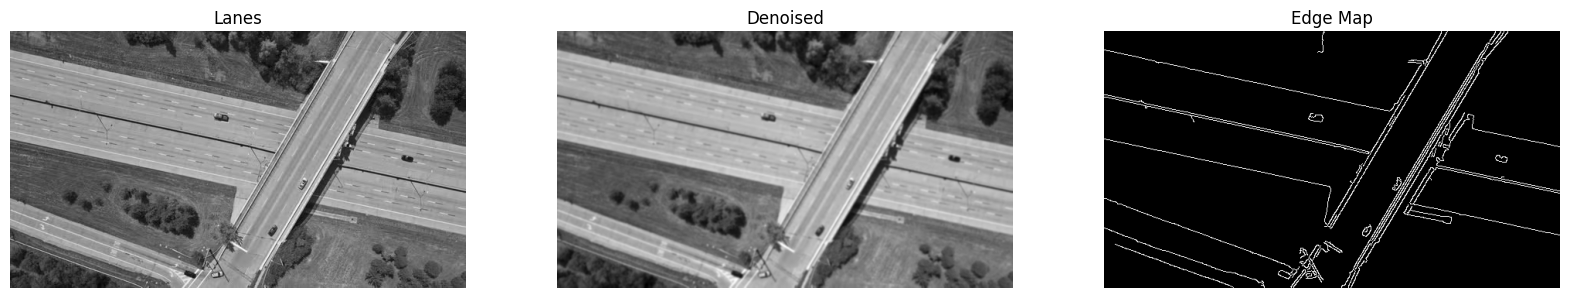

In [155]:
def myGauFilter(img, window_size, sigma):
    kernel = cv2.getGaussianKernel(window_size, sigma)
    kernel = kernel * np.transpose(kernel)
    return cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

lanes = mpimg.imread('images/lanes.jpg')
lanes = color.rgb2gray(lanes) * 255.0
denoised = myGauFilter(lanes.astype(np.uint8), 7, 1)
canny = cv2.Canny(denoised, 100, 300)

fig = plt.figure(figsize=(20, 6))
ax = []
for i in range(3):
    ax.append(fig.add_subplot(1,3,i+1))
    ax[i].axis('off')
ax[0].title.set_text('Lanes')
ax[1].title.set_text('Denoised')
ax[2].title.set_text('Edge Map')
ax[0].imshow(lanes, cmap='gray')
ax[1].imshow(denoised, cmap='gray')
ax[2].imshow(canny, cmap='gray')
plt.show()

b) (15 points) Implement a function that detects lines using the Hough Transform. The inputs should be the image edge map and a threshold which specifies the number of votes required by the accumulator to be considered a line. The output should be an image that displays the computed lines.

In [156]:
def hough_transform(edge_map, threshold=100, num_lines=0):
    # if num_lines set to 0, then it is ignored

    width, height = edge_map.shape
    diagonal = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diagonal, diagonal, diagonal * 2)
    thetas = np.deg2rad(np.arange(-90, 90, 1))
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    A = np.zeros((2 * diagonal, len(thetas)), dtype=np.uint8)

    xs, ys = np.nonzero(edge_map)
    for i in range(len(xs)):
        x = xs[i]
        y = ys[i]
        for theta_idx in range(len(thetas)):
            rho = diagonal + int(x * cos_t[theta_idx] + y * sin_t[theta_idx])
            A[rho, theta_idx] += 1

    indices =  np.argpartition(A.flatten(), -2)[-num_lines:]
    indices = np.vstack(np.unravel_index(indices, A.shape)).T

    lines = np.transpose(np.zeros_like(edge_map).astype(np.uint8))
    lines = cv2.cvtColor(lines, cv2.COLOR_GRAY2BGR)
    for i in range(len(indices)):
        if (A[indices[i][0], indices[i][1]] > threshold):
            rho = rhos[indices[i][0]]
            a = cos_t[indices[i][1]]
            b = sin_t[indices[i][1]]
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 - b * 1000)
            y1 = int(y0 + a * 1000)
            x2 = int(x0 + b * 1000)
            y2 = int(y0 - a * 1000)
            cv2.line(lines, (x1, y1), (x2, y2), (0, 255, 0), 1)
    return np.transpose(cv2.cvtColor(lines, cv2.COLOR_BGR2GRAY))

c) (5 points) Apply your function to lanes.jpg. Play around with the threshold and parameters of the edge detector to get something that resembles the lines in the image. Display the edge map and the detected lines image.

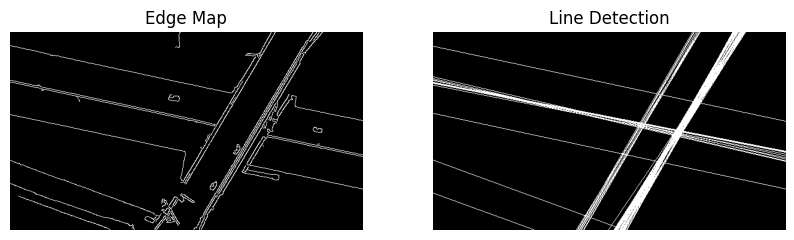

In [157]:
lines = hough_transform(canny, threshold=110)
fig = plt.figure(figsize=(10, 3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('Edge Map')
ax2.title.set_text('Line Detection')
ax1.imshow(canny, cmap='gray')
ax2.imshow(lines, cmap='gray')
plt.show()